In [34]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load).dropna()
ride_data = pd.read_csv(ride_data_to_load).dropna()

# Combine the data into a single dataset

data_table = pd.merge(ride_data,city_data,how="left", on= "city")
# Display the data table for preview

data_table.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [28]:
print(data_table.columns)

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')


## Bubble Plot of Ride Sharing Data

/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


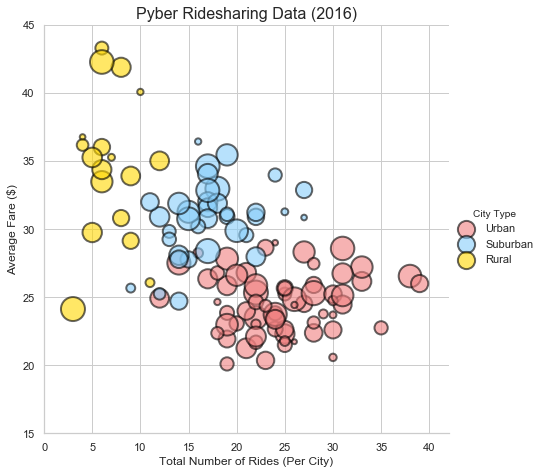

In [100]:
# Obtain the x and y coordinates for each of the three city types
x_list = data_table.groupby(by='city')['ride_id'].count()


y_list = data_table.groupby(by='city')['fare'].mean()
y_list = y_list.round(2)

z_list = data_table.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*8
# color: based on the type for each city
type_list = data_table.drop_duplicates(subset='city', keep='first').set_index('city')['type']

# create dataframe to work with
bubbleData_df = pd.DataFrame({'x':x_list,'y':y_list,'z':z_list,'City Type':type_list})

# create color list
color_list = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

# create scatterplot


bubblePlot=sns.lmplot(x='x', y='y', data=bubbleData_df, hue='City Type', palette=color_list,\
                      fit_reg=False, size=6.5,\
                      legend=True,legend_out=True,\
                      scatter_kws={'s':z_list, 'alpha':0.6, 'edgecolors':'black', 'linewidths':2})
plt.xlim(0,42)
plt.ylim(15,45)
plt.title("Pyber Ridesharing Data (2016)",{'fontname':'Arial','fontsize':16})
plt.xlabel("Total Number of Rides (Per City)",{'fontname':'Arial','fontsize':12})
plt.ylabel("Average Fare ($)",{'fontname':'Arial','fontsize':12})
plt.show()




## Total Fares by City Type

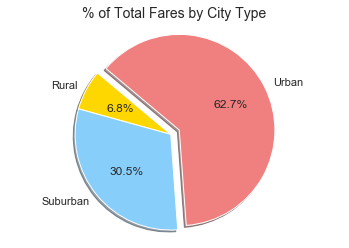

In [89]:
# create dataframe
fareByCity_df = pd.DataFrame(data_table.groupby(by='type')['fare'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
               fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, explode=explode,autopct='%1.1f%%', startangle=140,\
        colors=colors, shadow=True)
ax1.axis('equal')

plt.title("% of Total Fares by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

## Total Rides by City Type

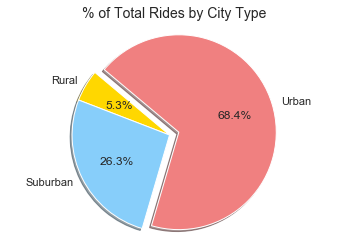

In [96]:
ridesByCity_df = pd.DataFrame(data_table.groupby(by='type')['ride_id'].count())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
               ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]
explode = (0, 0, 0.1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%',\
        startangle=140, colors=colors, explode=explode, shadow=True)
ax1.axis('equal')

plt.title("% of Total Rides by City Type",{'fontname':'Arial','fontsize':14})
plt.show()

## Total Drivers by City Type

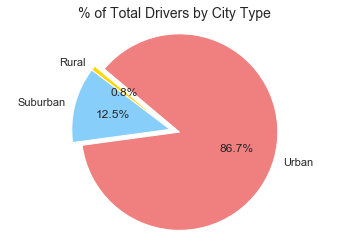

In [99]:
driversByCity_df = pd.DataFrame(data_table.groupby(by='type')['driver_count'].sum())

# create labels, wedge slices, colors, explode
labels = ['Rural', 'Suburban', 'Urban']
wedge_sizes = [driversByCity_df['driver_count']['Rural']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Suburban']/driversByCity_df['driver_count'].sum(),\
               driversByCity_df['driver_count']['Urban']/driversByCity_df['driver_count'].sum()]
explode = (0, 0, 0.1)

# create and display pie chart
fig1, ax1 = plt.subplots()
ax1.pie(wedge_sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
ax1.axis('equal')

plt.title("% of Total Drivers by City Type",{'fontname':'Arial','fontsize':14})
plt.show()